In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
names = ["Length", "Left", "Right", "Bottom", "Top", "Diagonal"]
df = pd.read_csv("data/swissbanknotes.txt", sep=' ', index_col='key')
df

,Length,Left,Right,Bottom,Top,Diagonal
key,,,,,,
BN1,214.8,131.0,131.1,9.0,9.7,141.0
BN2,214.6,129.7,129.7,8.1,9.5,141.7
BN3,214.8,129.7,129.7,8.7,9.6,142.2
BN4,214.8,129.7,129.6,7.5,10.4,142.0
BN5,215.0,129.6,129.7,10.4,7.7,141.8
...,...,...,...,...,...,...
BN196,215.0,130.4,130.3,9.9,12.1,139.6
BN197,215.1,130.3,129.9,10.3,11.5,139.7
BN198,214.8,130.3,130.4,10.6,11.1,140.0


In [3]:
X = df.values
X = scale(X)
print(X)


[[-0.25558323  2.43945206  2.83704322 -0.28973195 -1.18673534  0.44937213]
 [-0.78804829 -1.17043716 -0.63638092 -0.91430383 -1.43644293  1.05839535]
 [-0.25558323 -1.17043716 -0.63638092 -0.49792258 -1.31158914  1.49341194]
 ...
 [-0.25558323  0.49566556  1.10033115  0.82061805  0.56121782 -0.42066104]
 [-0.52181576  1.6064007   2.09273805  1.2369993   0.68607161 -0.94268094]
 [-1.58674587 -0.61506959 -0.14017747  0.54303055  1.06063301 -0.76867431]]


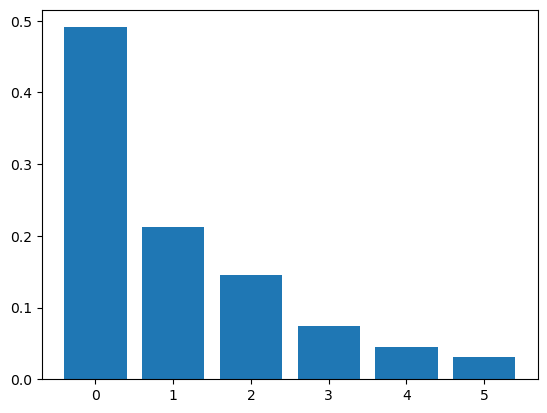

In [4]:
pca_sk = PCA()
pca_sk.fit(X)
plt.bar(range(X.shape[1]), pca_sk.explained_variance_ratio_)
plt.show()

In [5]:
from mlgrad.pca import find_rob_pc_all, find_pc_all
from mlgrad.af import averaging_function
import mlgrad.func as func

In [6]:
_, Ls0, Us0 = find_pc_all(X)

In [12]:
wma = averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=0.8)
_, Ls, Us = find_rob_pc_all(X, wma)

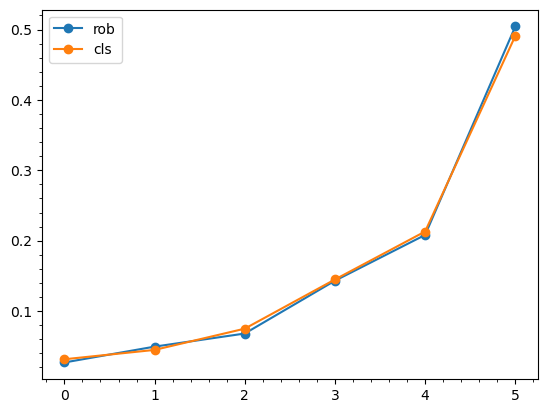

In [13]:
plt.plot(sorted(Ls/Ls.sum()), marker='o', label='rob')
plt.plot(sorted(Ls0/Ls0.sum()), marker='o', label='cls')
plt.legend()
plt.minorticks_on()
plt.show()

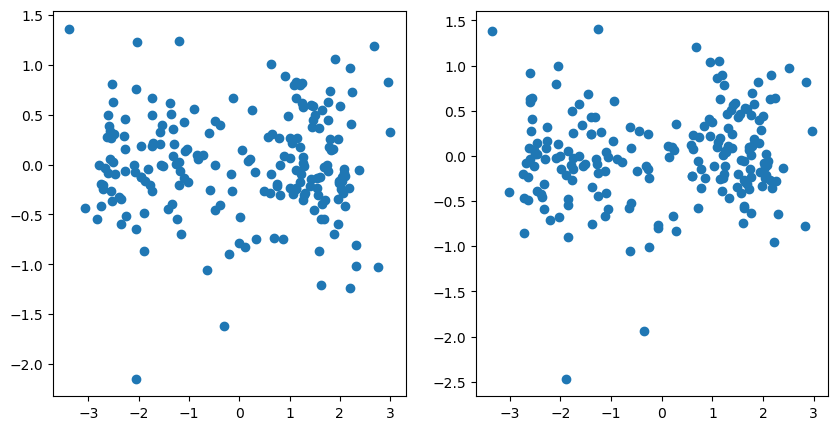

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(Us0[0], Us0[4])
plt.subplot(1,2,2)
plt.scatter(Us[0], Us[4])
plt.show()